In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 11:18:51,466] A new study created in memory with name: no-name-95c480b5-7750-4ba6-87e8-b92929dc7998
[I 2025-04-27 11:18:51,490] Trial 0 finished with value: 0.7307924984875983 and parameters: {'C': 0.036956679956174666, 'kernel': 'rbf', 'gamma': 0.0002302412333570802, 'max_iter': 127}. Best is trial 0 with value: 0.7307924984875983.
[I 2025-04-27 11:18:51,507] Trial 1 finished with value: 0.8218390804597702 and parameters: {'C': 85.81342982855381, 'kernel': 'poly', 'gamma': 0.01693192085972642, 'degree': 3, 'max_iter': 2060}. Best is trial 1 with value: 0.8218390804597702.
[I 2025-04-27 11:18:51,526] Trial 2 finished with value: 0.9510586811857229 and parameters: {'C': 6.060449281783517, 'kernel': 'rbf', 'gamma': 0.017252138475466642, 'max_iter': 1153}. Best is trial 2 with value: 0.9510586811857229.
[I 2025-04-27 11:18:51,539] Trial 3 finished with value: 0.947610405323654 and parameters: {'C': 0.1594779921211844, 'kernel': 'linear', 'max_iter': 1716}. Best is trial 2 wi

Best trial:
Accuracy: 0.9756200846944949
Best hyperparameters:  {'C': 0.4481782611082687, 'kernel': 'linear', 'max_iter': 9915}


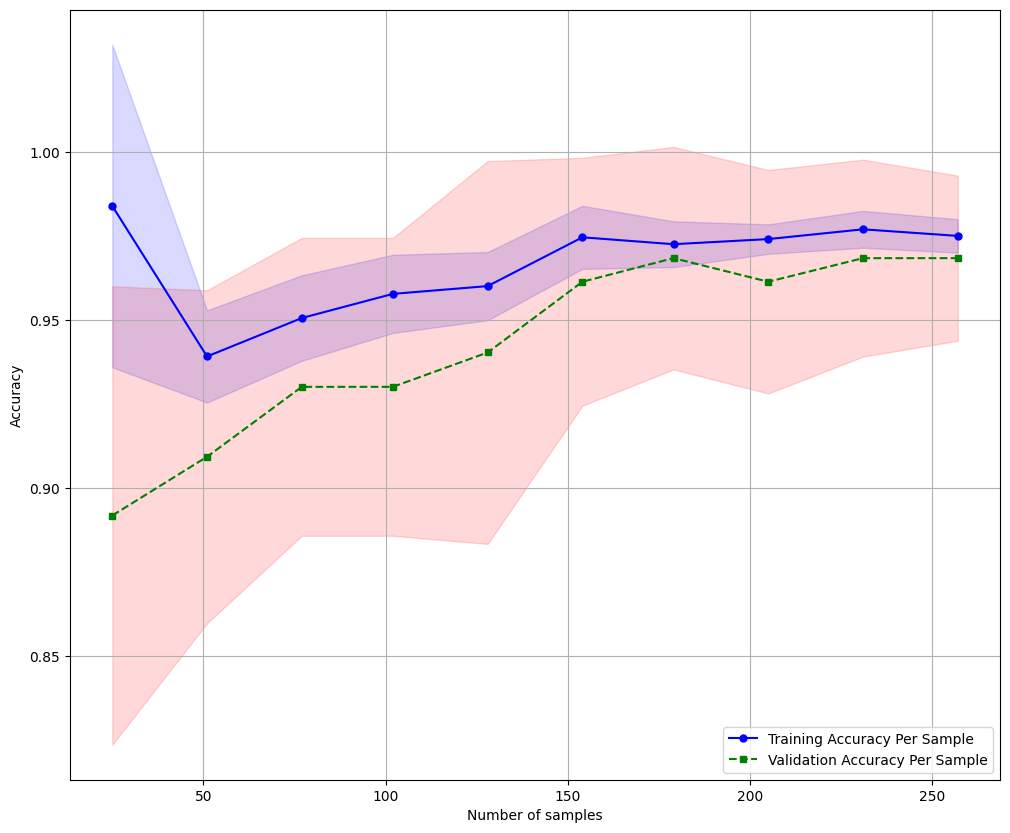

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9937


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', outlier_params)

helper.train_and_evaluate_model('svc', df_train_outlier_removed.iloc[:,:-1], X_test_scaled, df_train_outlier_removed.iloc[:,-1], y_test)